## ASSIGNMENT 2


### Part 1

Nonparametric estimation is a statistical method that allows the functional form of a fit to data to be obtained in the absence of any guidance or constraints from theory [1]. There are two kinds of nonparametric estimation techniques available:one is called **Kernel Density Estimation (KDE) or Parzen Windows** and the other is **the k-nearest neighbor-density estimate**. They are fundamentally very similar, but exhibit some different statistical properties [2].

In Part 1 you will make density estimation by using Kernel Density Estimation (Parzen) and kNN from non-parametric density estimation methods and, make classification via Bayesian aproach. In this context, you are given the train and test datasets generated from bimodal 2D Gaussian distributions for two-classes. You are expected to:

1- For each sample *x* at the test set, compute the density estimation (i.e. estimated probabilities of samples using KDE and kNN) to obtain a likelihood P(x | C), for each class C.

2- From the number of examples of each class in the training set, compute the class prior, P(C).

3- For each test point x, get an estimate for the posterior probability for each class is P(C|x)∝P(x|C)P(C). The class which maximizes this posterior is the label assigned to the point.

4-Finally, save your result for each sample with the classification labels in a csv file. 

You are expected to find the Kernel Density estimation using Gaussian Kernels (check the lecture notes for the details) with your own implementations. Make some experiments to determine the best bandwidth for your kernels. You may check your estimations using the Scikitlearn libraries; this tutorial could be helpful as a starter [3].


### Part 2 

You will make a regression analysis to the second dataset, as in your lecture notes, using M=1, M=3, M=6, and M=9. Report the error rate of the f(x) estimations in the test data of your models in a separate cell from regression coding. Tabulate your results with and without regularization. Please also provide your experiment results with different regularization parameters in your reports.

#### Note: Don't forget add comments in your codes.

[1]: https://mathworld.wolfram.com/NonparametricEstimation.html#:~:text=Nonparametric%20estimation%20is%20a%20statistical,have%20no%20meaningful%20associated%20parameters.

[2]:https://www.cs.cmu.edu/~epxing/Class/10701-08s/reading/R1-b.pdf

[3]:https://jakevdp.github.io/PythonDataScienceHandbook/05.13-kernel-density-estimation.html 


In [ ]:
Part 1

In [1]:
import math

import numpy as np
from pandas import read_csv, DataFrame
import matplotlib.pyplot as plt
from math import sqrt
import os

"""util functions"""

def writeToCSV(path, dataFrame, name):
    os.makedirs(path, exist_ok=True)
    dataFrame.to_csv(path + "/" + name)

def readData():
    class1 = read_csv("data/Part1/Class1.csv")
    class2 = read_csv("data/Part1/Class2.csv")
    test = read_csv("data/Part1/Test.csv")

    class1Array = np.array(class1)
    class2Array = np.array(class2)
    testArray = np.array(test)

    return class1Array, class2Array, testArray


"""Methods for kNN"""

# Finds the distance between 2 points

def findDistance(data1, data2):
    distance = 0
    for i in range(len(data1) - 1):
        distance += (data1[i] - data2[i]) ** 2
    return sqrt(distance)


# Finds nearest neighbours

def findNN(data, testedPoint, k):
    allDistances = []
    for dataPoint in data:
        dist = findDistance(dataPoint, testedPoint)
        allDistances.append((dataPoint, dist))

    # Sort the tuple by distance values
    allDistances.sort(key=lambda tup: tup[1])

    # Find k nearest neighbours
    kNN = []
    for i in range(k):
        kNN.append(allDistances[i][0])

    return kNN


# Labels the data


def classifyKNN(data, testedPoint, k):
    kNN = findNN(data, testedPoint, k)
    classesOfNeighbours = [c[-1] for c in kNN]

    # Label class1 if there are more 1s, else label class2
    class1Count = 0
    for i in classesOfNeighbours:
        if i == 1:
            class1Count += 1

    # If prob more than 50% select that class
    new_class = 1 if class1Count > k / 2 else 2
    return new_class


"""Methods for KDE"""

# I need to define H here which is a 2x2 matrix. H is tested and found optimal.
# Source of KDE implementation: https://en.wikipedia.org/wiki/Multivariate_kernel_density_estimation
H = np.array([[0.052, 0.510],
              [0.510, 8.882]])


# Gaussian kernel function K(x) is defined here. x is a vector including (x1,x2)
def gaussianKernel(x):
    detH = np.linalg.det(H)
    xT = x.T
    hI = np.linalg.inv(H)
    res = np.matmul(xT, hI)
    res = np.matmul(res, x)

    return ((2 * math.pi) ** -1) * detH ** 0.5 * (math.e ** (-0.5 * res))


# Estimates the density around a given dataPoint
def estimateDensity(dataPoint, dataset, n):
    # Define x
    dataPoint = np.array([dataPoint[0], dataPoint[1]])
    sum = 0
    for i in dataset:
        # Define xi
        xi = np.array([i[0], i[1]])
        sum += gaussianKernel(dataPoint - xi)

    result = sum / n
    return result


# For all test points, makes estimations and selects class with higher probable density

def classifyParzen(testPoints, dataPoints, dataPoints2):
    for testPoint in testPoints:
        est1 = estimateDensity(testPoint, dataPoints, 250)
        est2 = estimateDensity(testPoint, dataPoints2, 250)

        # Make classification
        testPoint[-1] = 1 if est1 > est2 else 2


if __name__ == "__main__":
    class1 = readData()[0]
    class2 = readData()[1]
    testData = readData()[2]

    dataPoints = []  # Class1
    dataPoints2 = []  # Class2
    X = []  # Class1 + Class2

    for i in range(1, 251):
        # Create a dataPoint and add label 1 for class 1
        dataPoints.append([class1[0][i], class1[1][i], 1])

        # plt.scatter(class1[0][i], class1[1][i], color="green", marker="v")

        # Create a dataPoint and add label 2 for class 2
        dataPoints2.append([class2[0][i], class2[1][i], 2])

        # plt.scatter(class2[0][i], class2[1][i], color="red")

    """Create our testPoints"""
    testPoints = []

    for i in range(1, 501):
        # -1 for initial class of testData
        testPoints.append([testData[0][i], testData[1][i], -1])

    testPointsForKDE = list(testPoints)

    # Plot the initial data if we want to

    # plt.xlabel("x1")
    # plt.ylabel("x2")
    # plt.show()

    X = dataPoints + dataPoints2

    for testPoint in testPoints:
        """Do Bayes classification using kNN"""
        newClass = classifyKNN(X, testPoint, k=3)
        testPoint[-1] = newClass

        # Plot the results if we want to
        # if newClass == 1:
        #     plt.scatter(testPoint[0], testPoint[1], color="green", marker="v")
        # elif newClass == 2:
        #     plt.scatter(testPoint[0], testPoint[1], color="red")

    # Plot the results if we want to

    # plt.xlabel("x1")
    # plt.ylabel("x2")
    # plt.show()

    """Write the results"""

    df = DataFrame({'x1': [i[0] for i in testPoints],
                    'x2': [i[1] for i in testPoints],
                    'classResult': [i[2] for i in testPoints]})

    writeToCSV("result", df, "afterKNN.csv")

    """Do the classification via Parzen (KDE) method"""
    classifyParzen(testPointsForKDE, dataPoints, dataPoints2)

    """Write the results"""

    df2 = DataFrame({'x1': [i[0] for i in testPointsForKDE],
                     'x2': [i[1] for i in testPointsForKDE],
                     'classResult': [i[2] for i in testPointsForKDE]})

    writeToCSV("result", df2, "afterKDE.csv")


In [ ]:
Part 2

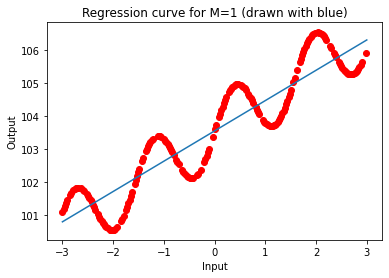


Mean error (%) for M = 1:  0.599771312197234 

Results for M = 1 without regularization:

    Test input  Estimated output  Actual output  Error rate(%)
0    -2.879518        100.917501     101.542488       0.615493
1     1.963855        105.364475     106.519285       1.084132
2     0.927711        104.413132     103.944140       0.451196
3    -0.662651        102.952932     102.421281       0.519083
4     2.325301        105.696339     106.003991       0.290227
5     2.012048        105.408723     106.548679       1.069892
6    -1.771084        101.935217     101.066188       0.859861
7     0.253012        103.793653     104.656362       0.824325
8    -0.566265        103.041429     102.220641       0.802958
9    -2.662651        101.116619     101.833865       0.704329
10   -2.084337        101.647601     100.585658       1.055760
11    2.253012        105.629966     106.209554       0.545702
12    1.530120        104.966238     104.923565       0.040671
13    1.072289        104.5

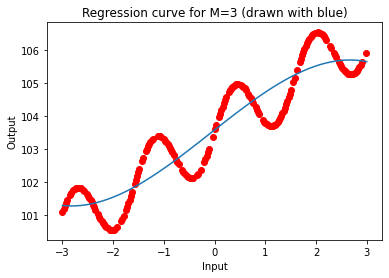


Mean error (%) for M = 3:  0.5516269154457748 

Results for M = 3 without regularization:

    Test input  Estimated output  Actual output  Error rate(%)
0    -2.879518        101.289053     101.542488       0.249585
1     1.963855        105.510158     106.519285       0.947366
2     0.927711        104.658273     103.944140       0.687035
3    -0.662651        102.800423     102.421281       0.370180
4     2.325301        105.659904     106.003991       0.324598
5     2.012048        105.535407     106.548679       0.950995
6    -1.771084        101.710100     101.066188       0.637119
7     0.253012        103.894853     104.656362       0.727628
8    -0.566265        102.912470     102.220641       0.676800
9    -2.662651        101.298050     101.833865       0.526166
10   -2.084337        101.504289     100.585658       0.913282
11    2.253012        105.637539     106.209554       0.538572
12    1.530120        105.218676     104.923565       0.281263
13    1.072289        104.

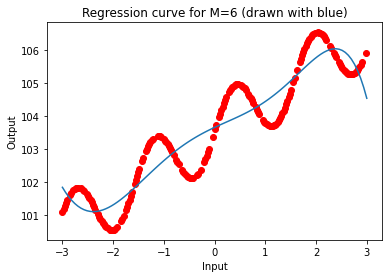


Mean error (%) for M = 6:  0.5698304588278549 

Results for M = 6 without regularization:

    Test input  Estimated output  Actual output  Error rate(%)
0    -2.879518        101.571769     101.542488       0.028837
1     1.963855        105.735148     106.519285       0.736146
2     0.927711        104.378264     103.944140       0.417651
3    -0.662651        103.076020     102.421281       0.639261
4     2.325301        106.042473     106.003991       0.036302
5     2.012048        105.794259     106.548679       0.708051
6    -1.771084        101.577304     101.066188       0.505724
7     0.253012        103.842734     104.656362       0.777428
8    -0.566265        103.179850     102.220641       0.938372
9    -2.662651        101.246872     101.833865       0.576422
10   -2.084337        101.245786     100.585658       0.656284
11    2.253012        106.012929     106.209554       0.185129
12    1.530120        105.122156     104.923565       0.189272
13    1.072289        104.

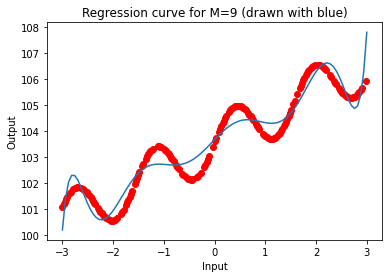


Mean error (%) for M = 9:  0.4313460927739503 

Results for M = 9 without regularization:

    Test input  Estimated output  Actual output  Error rate(%)
0    -2.879518        102.034161     101.542488       0.484204
1     1.963855        106.171784     106.519285       0.326233
2     0.927711        104.349313     103.944140       0.389799
3    -0.662651        102.716464     102.421281       0.288205
4     2.325301        106.505095     106.003991       0.472722
5     2.012048        106.311930     106.548679       0.222198
6    -1.771084        101.662157     101.066188       0.589682
7     0.253012        104.131683     104.656362       0.501335
8    -0.566265        102.769070     102.220641       0.536516
9    -2.662651        101.974748     101.833865       0.138346
10   -2.084337        100.743884     100.585658       0.157305
11    2.253012        106.602457     106.209554       0.369932
12    1.530120        104.756493     104.923565       0.159232
13    1.072289        104.

In [4]:
import numpy as np
from pandas import read_csv, DataFrame
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

"""util functions"""


def writeToCSV(path, dataFrame, name):
    os.makedirs(path, exist_ok=True)
    dataFrame.to_csv(path + "/" + name)


def readData():
    trainData = read_csv("data/Part2/train.csv")
    testData = read_csv("data/Part2/test.csv")

    trainArr = np.array(trainData)
    testArr = np.array(testData)

    return trainData, testData, trainArr, testArr


def polyReg(X_train, y_train, deg, X_tst, y_tst):
    plt.scatter(X_train, y_train, color='red')

    # Create a model
    model = np.poly1d(np.polyfit(X_train, y_train, deg))
    line = np.linspace(-3, 3, 100)


    # Make predictions for test data and make predictions
    allPredictions = []
    errorRates = []

    for i in range(len(X_tst)):
        estimated = model(X_tst[i])
        real = y_tst[i]

        allPredictions.append(estimated)

        # Find what percent we failed
        errorRate = abs(estimated - real) / real * 100
        errorRates.append(errorRate)

    plt.title(f"Regression curve for M={deg} (drawn with blue)")

    plt.xlabel("Input")
    plt.ylabel("Output")
    plt.plot(line, model(line))
    plt.show()

    return allPredictions, errorRates


if __name__ == "__main__":
    trainDF, testDF, trainArray, testArray = readData()

    X = trainDF.iloc[:, 1].values
    y = trainDF.iloc[:, 2].values

    X_test = testDF.iloc[:, 1].values
    y_test = testDF.iloc[:, 2].values



    # Create the model and plot the function without regularization
    for M in [1, 3, 6, 9]:
        predictions, errors = polyReg(X, y, M, X_test, y_test)
        print(f"\nMean error (%) for M = {M}: ", sum(errors) / len(errors), "\n")

        resultDF = DataFrame({'Test input': X_test,
                              'Estimated output': predictions,
                              'Actual output': y_test,
                              'Error rate(%)': errors})

        print(f"Results for M = {M} without regularization:\n")
        print(resultDF)



    # Now, create the model and plot the function with regularization. I prefer to use Ridge regularization.
    # Check the estimations with different lambda variables
    for lmb in [0.1, 1, 10, 100]:

        # Make predictions by using polynomial features
        features = PolynomialFeatures(degree=9)
        x_train = X.reshape(-1, 1)
        y_train = y.reshape(-1, 1)

        X_train = features.fit_transform(x_train)

        x_predict = X_test.reshape(-1, 1)
        X_predict = features.fit_transform(x_predict)

        # Create regularization model
        model = Ridge(lmb, fit_intercept=False)
        model.fit(X_train, y_train)

        y_predict = model.predict(X_predict)

        # Calculate the error rate
        errorsPoly = abs(y_test - y_predict.flatten()) / y_test * 100

        print(f"\nMean error (%) M = 9 and lambda = {lmb}:", sum(errorsPoly) / len(errorsPoly), "\n")

        resultDF = DataFrame({'Test input': X_test.flatten(),
                              'Estimated output': y_predict.flatten(),
                              'Actual output': y_test.flatten(),
                              'Error rate(%)': errorsPoly.flatten()})

        print(f"Results for M = 9 and lambda = {lmb} with regularization:\n")
        print(resultDF)
